In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os
from getCitiBikeCSV import getCitiBikeCSV
from scipy import stats
%matplotlib inline

In [2]:
datestring1 = '201601'
getCitiBikeCSV(datestring1)

('Downloading', '201601')
file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
#df['date'] = pd.to_datetime(df['starttime'])

In [4]:
df.dropna(inplace=True)
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2


In [5]:
df['age'] = 2016 - df['birth year']
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,58.0
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,47.0
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,34.0


Mean: 40.0031365158 Sigma: 11.6791225803


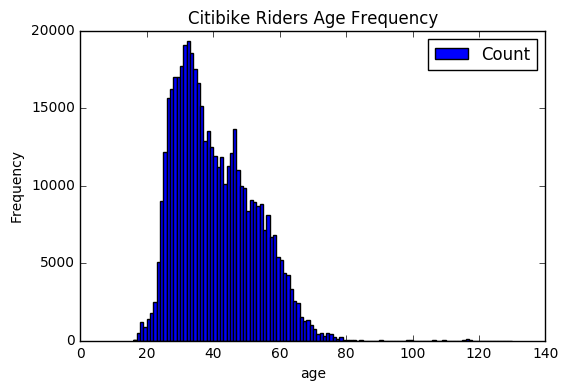

In [6]:
print 'Mean:', df.age.mean(), 'Sigma:', df.age.std()
#Histogram                                                                                              
bins = np.arange(df.age.min(), df.age.max(), 1)
plt.hist(df.age, bins, label='Count')
plt.title('Citibike Riders Age Frequency')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Figure 1: Histogrammed distribution of riders' ages by gender

# 1. Goodness of Fit test with Normal Distribution

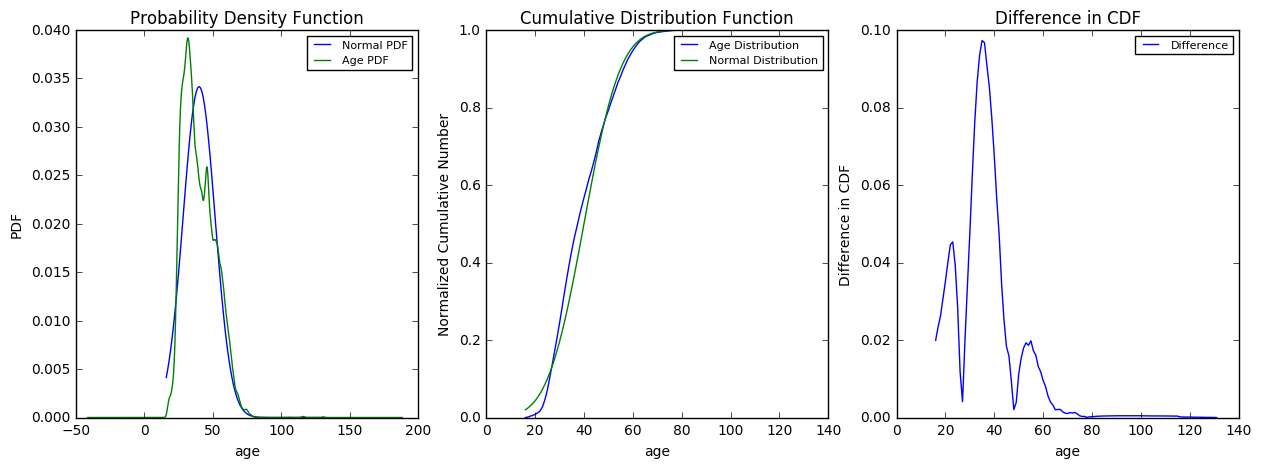

In [10]:
df_age = df['age'].groupby(df.age).agg([np.count_nonzero])
df_age_N = df_age.cumsum()/df_age.cumsum().max()

diff = np.abs(df_age_N.count_nonzero - stats.norm.cdf(df_age.index.values, loc=df.age.mean(), scale=df.age.std()))

fig = plt.figure(figsize=(15,5))

# PDF
ax1 = fig.add_subplot(131)
ax1.plot(df_age.index.values, stats.norm.pdf(df_age.index.values, loc=df.age.mean(), scale=df.age.std()),
        label="Normal PDF")
#ax1.plot(df_age.index.values, df_age/df_age.sum(), label="Age PDF")
df['age'].plot(kind='density', label="Age PDF")
plt.title('Probability Density Function')
plt.legend(loc = 'best', fontsize = 8)
plt.xlabel('age')
plt.ylabel('PDF')

#CDF
ax2 = fig.add_subplot(132)
ax2.plot(df_age_N.index.values, df_age_N, label="Age Distribution")
ax2.plot(df_age.index.values, stats.norm.cdf(df_age.index.values, loc=df.age.mean(), 
                                             scale=df.age.std()),
                                             label="Normal Distribution")
plt.title('Cumulative Distribution Function')
plt.ylabel('Normalized Cumulative Number')
plt.xlabel('age')
plt.legend(loc = 'best', fontsize = 8)

#CDF Difference
ax3 = fig.add_subplot(133)
ax3.plot(df_age.index.values, diff, label="Difference")
plt.title('Difference in CDF')
plt.xlabel('age')
plt.ylabel('Difference in CDF')
plt.legend(loc = 'best', fontsize = 8)

# Figure 2: PDF & CDF of a normal distribution, rider's age distribution and their difference

## a) KS Test with Normal Distribution

### Significance Level = 0.05

### Null Hypothesis: Two distributions which are compared for goodness of fit test are identical.

#### In current scenario, Null Hypothesis($H_0$): The citibike rider's age distribution and the normal distribution(Mean: 40.0031365158 Sigma: 11.6791225803 ) are identical.

In [8]:
stats.kstest(df.age, stats.norm.cdf, args=(df.age.mean(), df_age.std()))

KstestResult(statistic=0.49854161663906749, pvalue=0.0)

#### The p-value is 0 which is less than significance level of 0.05, so we are rejecting the Null Hypothesis at  95% statistical significance level.  
#### The age distribution of citibike riders and the normal distribution are not identical.

## b) Anderson-Darling test with Normal Distribution

### Significance Level = 0.05

### Null Hypothesis: A sample is drawn from a population that follows a particular distribution

#### In current scenario, Null Hypothesis($H_0$): The citibike rider's age distribution is drawn from a population which follows the normal distribution(d.age).


In [9]:
stats.anderson(df.age, dist='norm')

AndersonResult(statistic=5693.0809600793873, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### The critical value obtained at the 5% significance level is 0.787 and the AD Statistic obtained is greater than the critical value, so as per the AD test description, we can reject the null hypothesis.
#### The age distribution of citibike riders is not taken from the normal distribution. 

# 2. Goodness of Fit test with Rayleigh Distribution

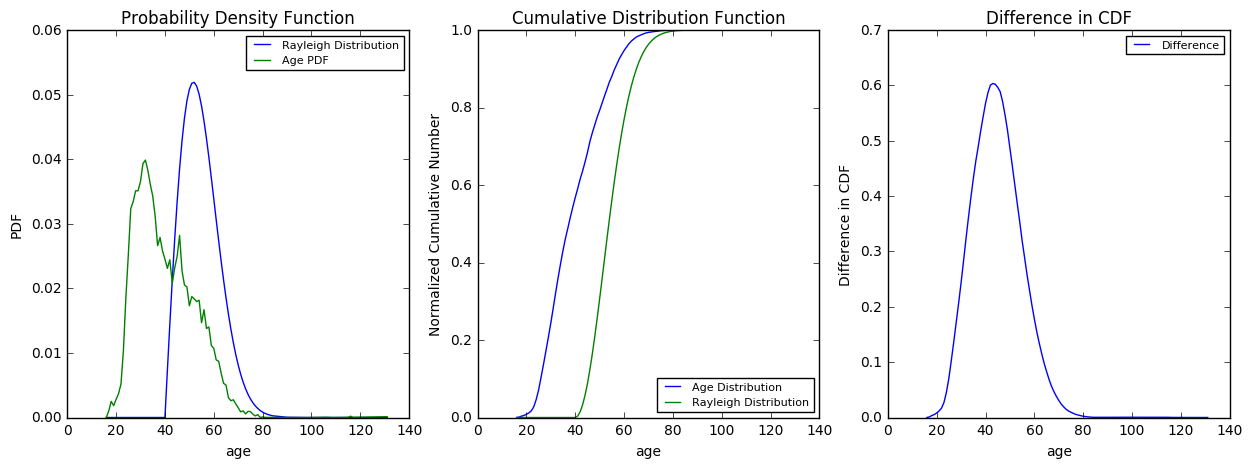

In [10]:
df_age = df['age'].groupby(df.age).agg([np.count_nonzero])
df_age_N = df_age.cumsum()/df_age.cumsum().max()

diff = np.abs(df_age_N.count_nonzero - stats.rayleigh.cdf(df_age.index.values, loc=df.age.mean(), scale=df.age.std()))

fig = plt.figure(figsize=(15,5))

# PDF
ax1 = fig.add_subplot(131)
ax1.plot(df_age.index.values, stats.rayleigh.pdf(df_age.index.values, loc=df.age.mean(), 
                                                 scale=df.age.std()),
                                                 label="Rayleigh Distribution")
ax1.plot(df_age.index.values, df_age/df_age.sum(), label="Age PDF")
plt.title('Probability Density Function')
plt.legend(loc = 'best', fontsize = 8)
plt.xlabel('age')
plt.ylabel('PDF')

#CDF
ax2 = fig.add_subplot(132)
ax2.plot(df_age_N.index.values, df_age_N, label="Age Distribution")
ax2.plot(df_age.index.values, stats.rayleigh.cdf(df_age.index.values, loc=df.age.mean(), 
                                                 scale=df.age.std()),
                                                 label="Rayleigh Distribution")
plt.title('Cumulative Distribution Function')
plt.ylabel('Normalized Cumulative Number')
plt.xlabel('age')
plt.legend(loc = 'best', fontsize = 8)

#CDF Difference
ax3 = fig.add_subplot(133)
ax3.plot(df_age.index.values, diff, label="Difference")
plt.title('Difference in CDF')
plt.xlabel('age')
plt.ylabel('Difference in CDF')
plt.legend(loc = 'best', fontsize = 8)

# Figure 3: PDF & CDF of a Rayleigh distribution, rider's age distribution and their difference

## a) KS Test with Normal Distribution

### Significance Level = 0.05

### Null Hypothesis: Two distributions which are compared for goodness of fit test are identical.

#### In current scenario, Null Hypothesis($H_0$): The citibike rider's age distribution and the Rayleigh distribution(Mean: 40.0031365158 Sigma: 11.6791225803 ) are identical.

In [22]:
stats.kstest(df.age, stats.rayleigh.cdf, args=(df.age.mean(), df_age.std()))

KstestResult(statistic=0.9998957389128742, pvalue=0.0)

## b)  Chisquare Test with Rayleigh Distribution

### Significance Level = 0.05

### Null Hypothesis: Categorical data has the given frequencies

# The Chisquare requires more than 5 entries 

In [20]:
stats.chisquare(df_age)

Power_divergenceResult(statistic=array([ 479182.04758183]), pvalue=array([ 0.]))